# Time Series Wind Roses

When dealing with Air Quality Time Series, it is important to assess how distributions are affected by Wind Direction.

The Weather Toolbox provides a Wind object to ease such analysis.

## Introduction


### Imports

We import required packages:

In [31]:
import numpy as np
import pandas as pd
import sns
from odapi.connectors import Irceline
from odapi.toolbox import Wind
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sns'

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("brussels_2012-2016.pickle").droplevel([1,2,3], axis=1)
client = Irceline()

## Roses and Boxplots

We will perform our analysis on the following series:

In [4]:
skeys = ['NO/41R001 (µg/m³)', 'PM-2.5/41N043 (µg/m³)', 'CO2/41R002 (ppm)',
          'O3/41R012 (µg/m³)', 'T/41R001 (°C)', 'WS/41R001 (m/s)']

skeys = [
    "BC/41R001 (µg/m³)",
    "CO/41R001 (mg/m³)",
    "NO/41R001 (µg/m³)",
    "NO2/41R001 (µg/m³)",
    "O3/41R001 (µg/m³)",
    "PM-10.0/41R001 (µg/m³)",
    "PM-2.5/41R001 (µg/m³)",
    "SO2/41R001 (µg/m³)",
    "T/41R001 (°C)",
    "WS/41R001 (m/s)"
]

In [5]:
SO2 = data.filter(regex="SO2").columns

In [6]:
q = (data.index >= "2014-09-19") & (data.index <= "2014-09-26")
q = data.index

In [7]:
data.loc[q]

seriekey                   BC/41N043 (µg/m³)  BC/41R001 (µg/m³)  \
start                                                             
2012-01-01 00:00:00+01:00                NaN                NaN   
2012-01-01 01:00:00+01:00                NaN                NaN   
2012-01-01 02:00:00+01:00                NaN                NaN   
2012-01-01 03:00:00+01:00                NaN                NaN   
2012-01-01 04:00:00+01:00                NaN                NaN   
...                                      ...                ...   
2015-12-31 19:00:00+01:00              3.805              1.915   
2015-12-31 20:00:00+01:00              3.060              1.640   
2015-12-31 21:00:00+01:00              2.580              1.085   
2015-12-31 22:00:00+01:00              2.000              0.925   
2015-12-31 23:00:00+01:00              1.250              0.630   

seriekey                   BC/41R002 (µg/m³)  BC/41R012 (µg/m³)  \
start                                                             
2012-01-01 00:00:00+01:00                NaN                NaN   
2012-01-01 01:00:00+01:00                NaN                NaN   
2012-01-01 02:00:00+01:00                NaN                NaN   
2012-01-01 03:00:00+01:00                NaN                NaN   
2012-01-01 04:00:00+01:00                NaN                NaN   
...                                      ...                ...   
2015-12-31 19:00:00+01:00              2.695              0.865   
2015-12-31 20:00:00+01:00              1.840              0.930   
2015-12-31 21:00:00+01:00              1.375              0.515   
2015-12-31 22:00:00+01:00              0.790              0.350   
2015-12-31 23:00:00+01:00              0.955              0.325   

seriekey                   CO/41B004 (mg/m³)  CO/41B006 (mg/m³)  \
start                                                             
2012-01-01 00:00:00+01:00                NaN                NaN   
2012-01-01 01:00:00+01:00                NaN                NaN   
2012-01-01 02:00:00+01:00                NaN                NaN   
2012-01-01 03:00:00+01:00                NaN                NaN   
2012-01-01 04:00:00+01:00                NaN                NaN   
...                                      ...                ...   
2015-12-31 19:00:00+01:00              0.275                NaN   
2015-12-31 20:00:00+01:00              0.305                NaN   
2015-12-31 21:00:00+01:00              0.270                NaN   
2015-12-31 22:00:00+01:00              0.230                NaN   
2015-12-31 23:00:00+01:00              0.220                NaN   

seriekey                   CO/41B008 (mg/m³)  CO/41N043 (mg/m³)  \
start                                                             
2012-01-01 00:00:00+01:00                NaN                NaN   
2012-01-01 01:00:00+01:00                NaN                NaN   
2012-01-01 02:00:00+01:00                NaN                NaN   
2012-01-01 03:00:00+01:00                NaN                NaN   
2012-01-01 04:00:00+01:00                NaN                NaN   
...                                      ...                ...   
2015-12-31 19:00:00+01:00                NaN              0.290   
2015-12-31 20:00:00+01:00                NaN              0.275   
2015-12-31 21:00:00+01:00                NaN              0.265   
2015-12-31 22:00:00+01:00                NaN              0.305   
2015-12-31 23:00:00+01:00                NaN              0.295   

seriekey                   CO/41R001 (mg/m³)  CO/41R002 (mg/m³)  ...  \
start                                                            ...   
2012-01-01 00:00:00+01:00                NaN                NaN  ...   
2012-01-01 01:00:00+01:00                NaN                NaN  ...   
2012-01-01 02:00:00+01:00                NaN                NaN  ...   
2012-01-01 03:00:00+01:00                NaN                NaN  ...   
2012-01-01 04:00:00+01:00                NaN                NaN  ...   
...     

In [8]:
scales = client.scales()
scales

{'BC': array([ 0, 10]),
 'CO2': array([350, 550]),
 'CO': array([0, 2]),
 'NO2': array([  0, 200]),
 'NO': array([  0, 200]),
 'O3': array([  0, 200]),
 'PM-10.0': array([  0, 150]),
 'PM-2.5': array([  0, 100]),
 'RH': array([  0, 100]),
 'SO2': array([ 0, 15]),
 'T': array([-15,  40]),
 'TOL': array([ 0, 25]),
 'p': array([ 950, 1150]),
 'WD': array([  0, 360]),
 'WS': array([ 0, 15]),
 'BZN': array([ 0, 10]),
 'EBZ': array([0, 5]),
 'MPX': array([0, 5]),
 'OXL': array([0, 5])}

In [9]:
scales["CO"][1] = 1
scales["BC"][1] = 5
scales["NO"][1] = 100
scales["PM-2.5"][1] = 40
scales["PM-10.0"][1] = 60
scales["CO2"][1] = 450
scales["O3"][1] = 100
scales["T"][1] = 30
scales["WS"][1] = 6

**Note:** There is a difference between Goniometric and Trigonometric systems. By defaults, Weather methods expect to get Goniometric angles (common meteorological reference) instead of Trigonometric angles.

BC/41R001 (µg/m³)
CO/41R001 (mg/m³)
NO/41R001 (µg/m³)
NO2/41R001 (µg/m³)
O3/41R001 (µg/m³)
PM-10.0/41R001 (µg/m³)
PM-2.5/41R001 (µg/m³)


/home/jlandercy/.local/lib/python3.10/site-packages/odapi-0.1.3-py3.10.egg/odapi/toolbox/weather.py:246: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axe = plt.subplots(figsize=figsize, subplot_kw={'projection': 'polar'})


SO2/41R001 (µg/m³)
T/41R001 (°C)
WS/41R001 (m/s)


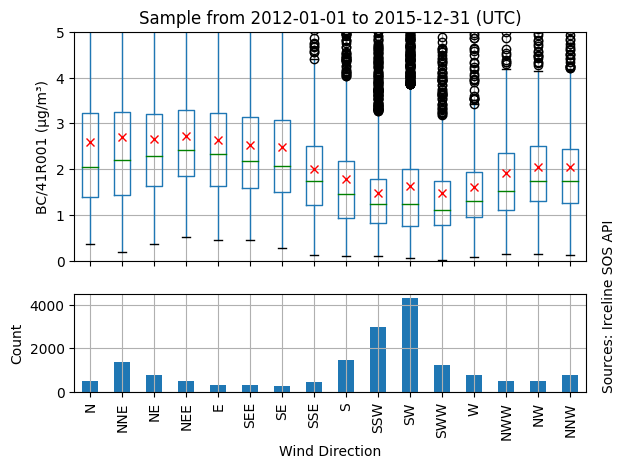

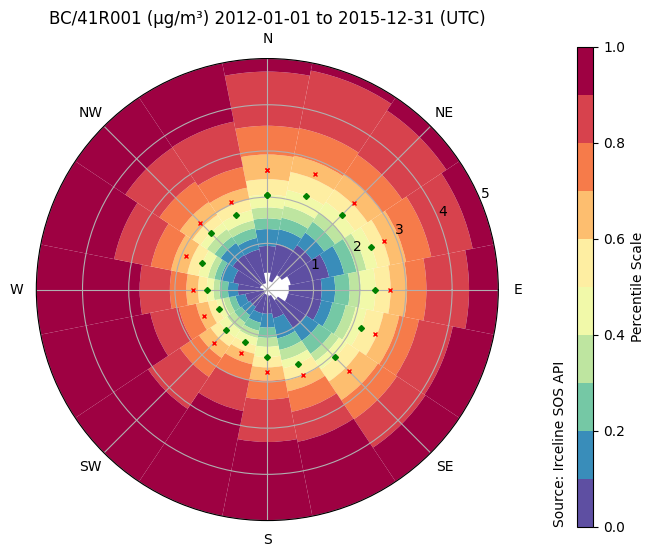

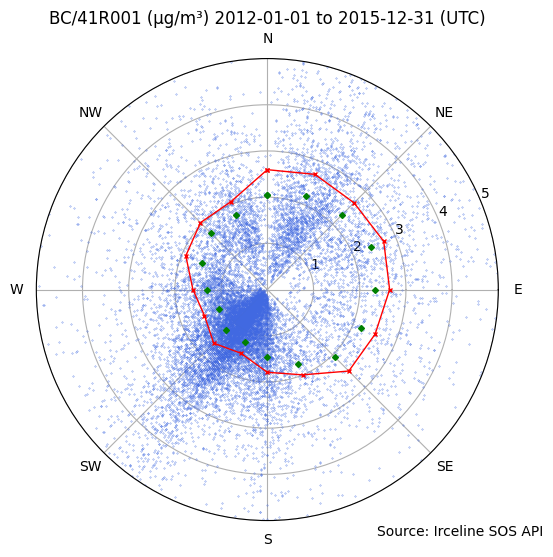

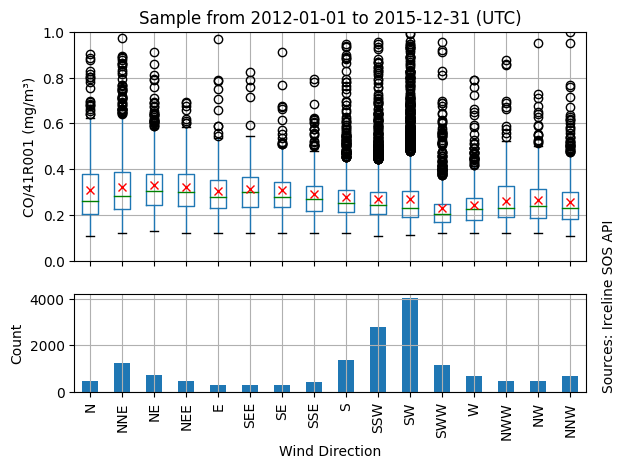

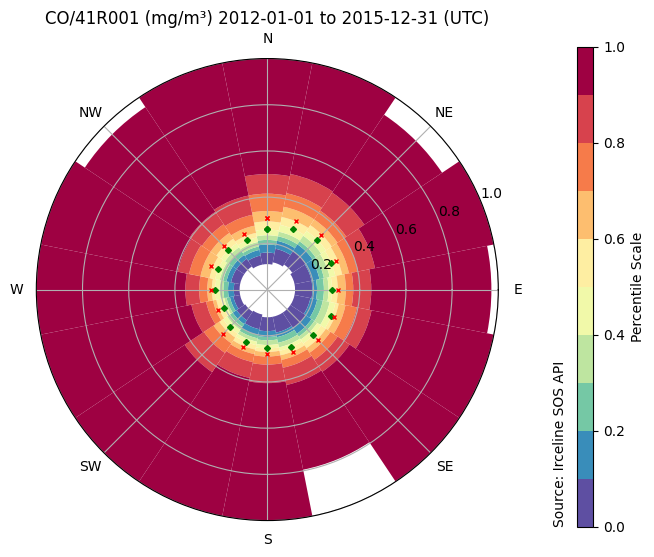

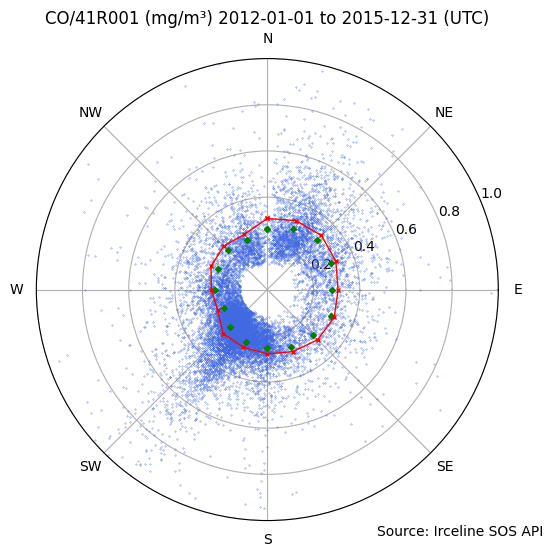

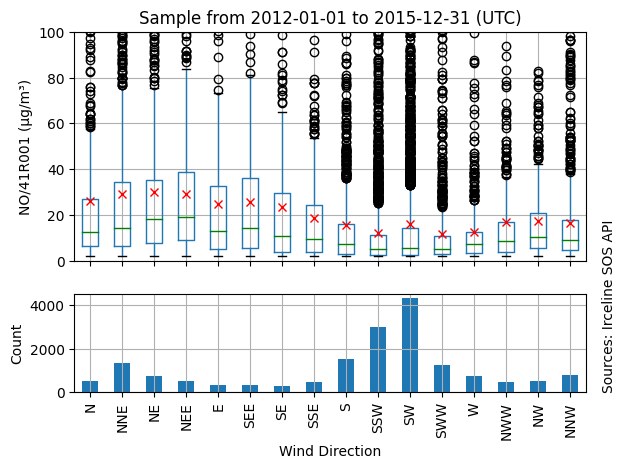

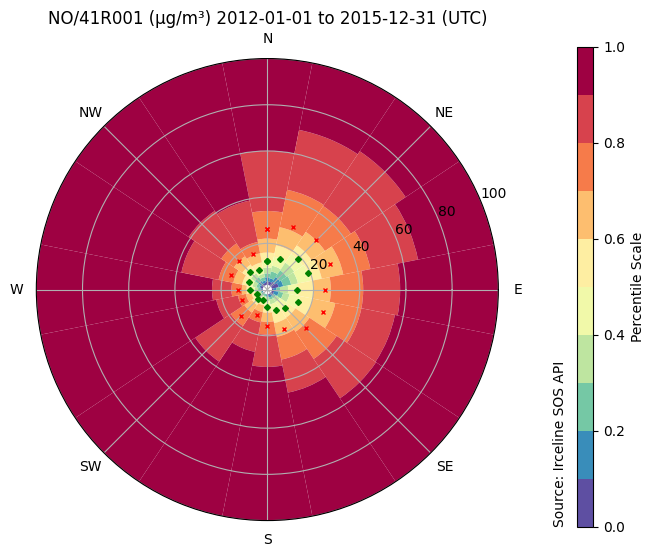

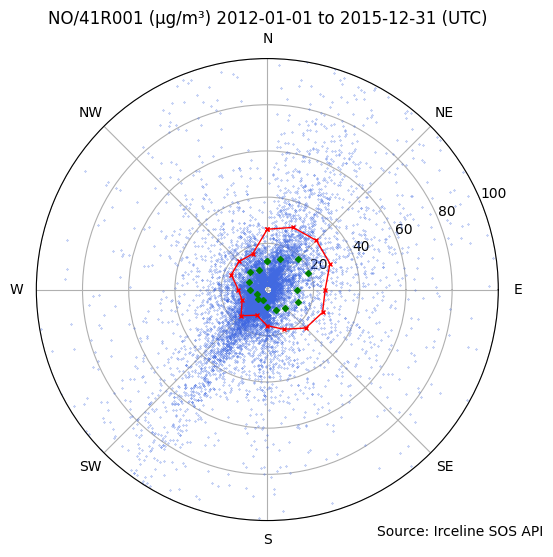

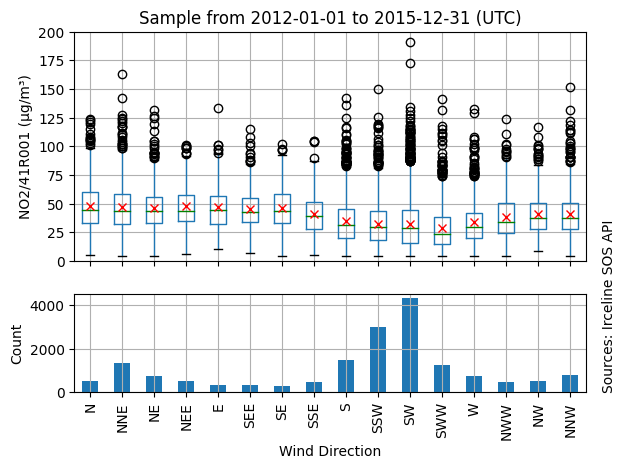

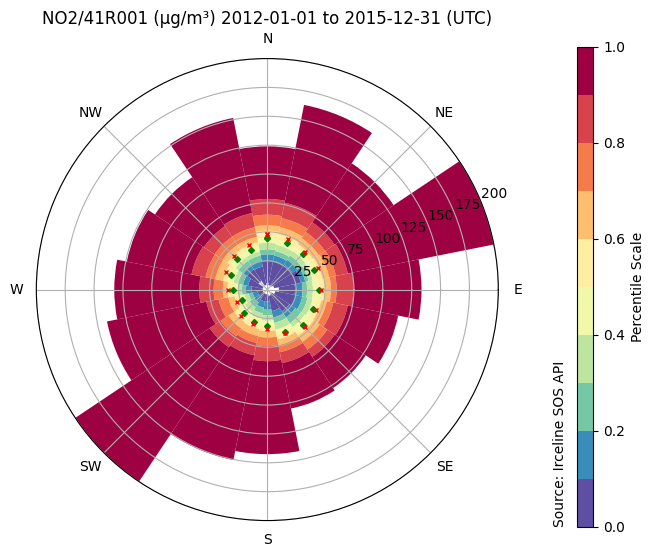

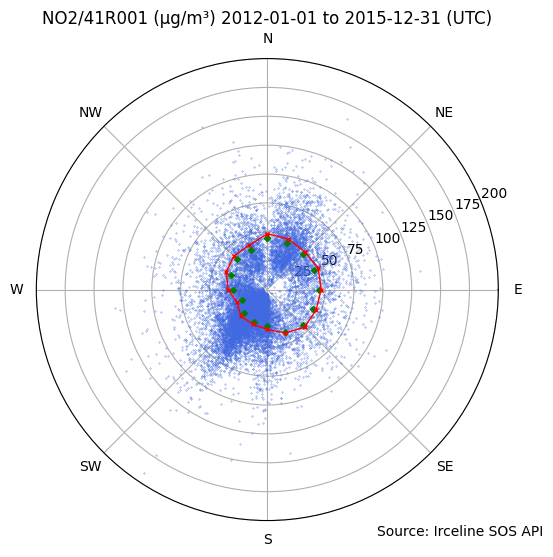

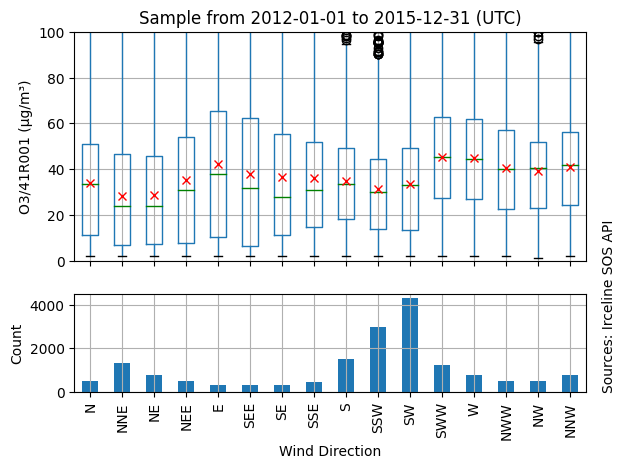

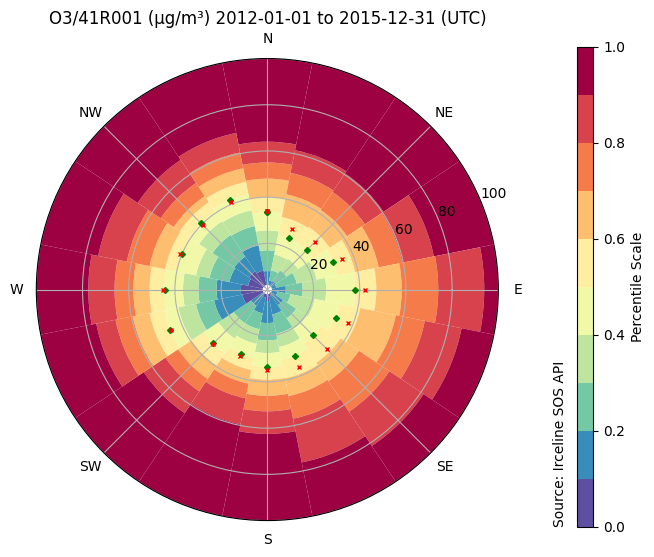

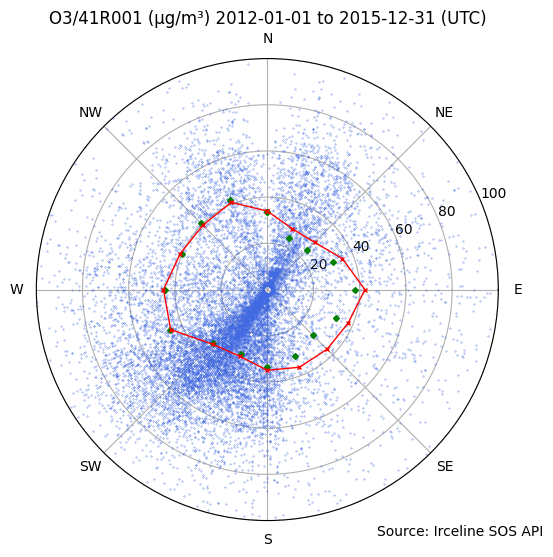

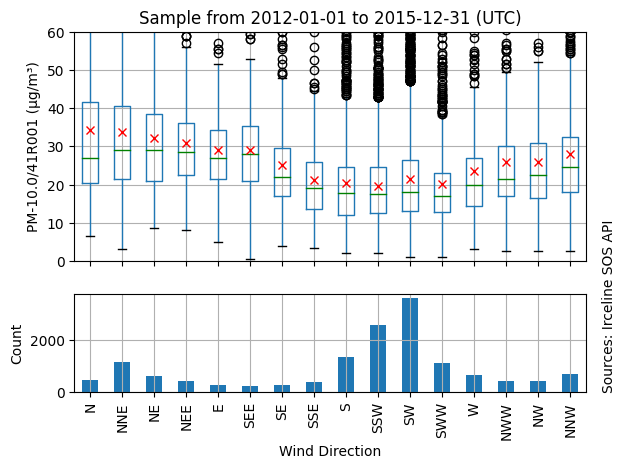

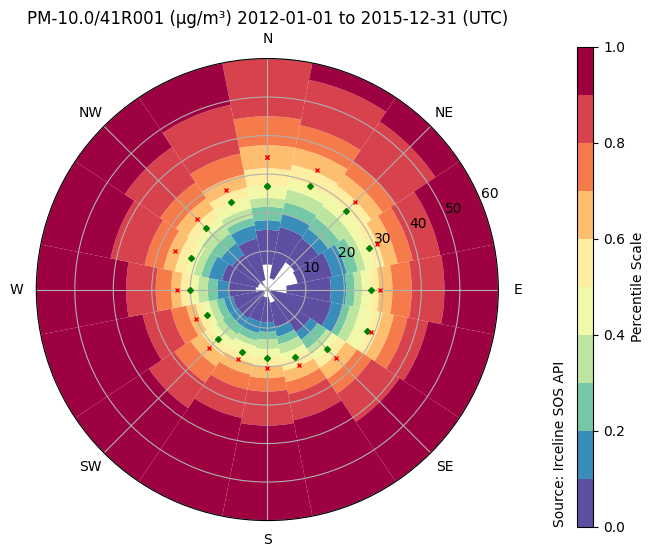

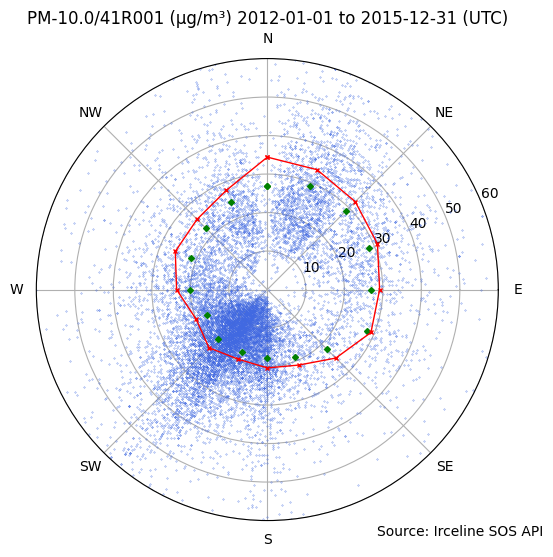

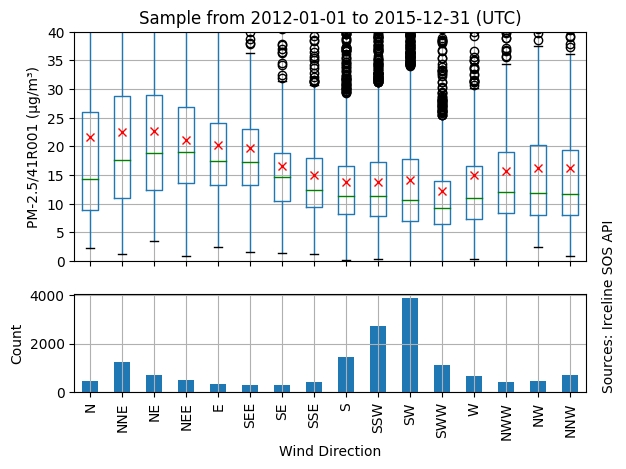

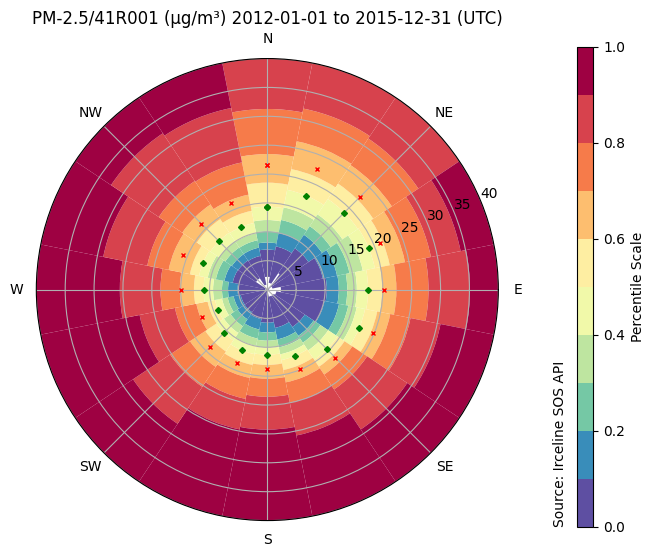

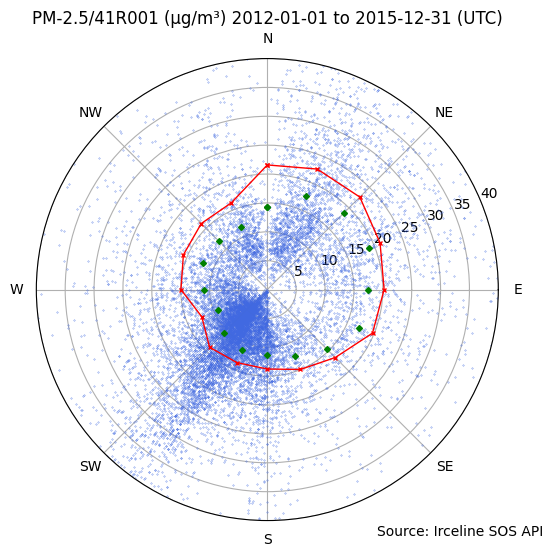

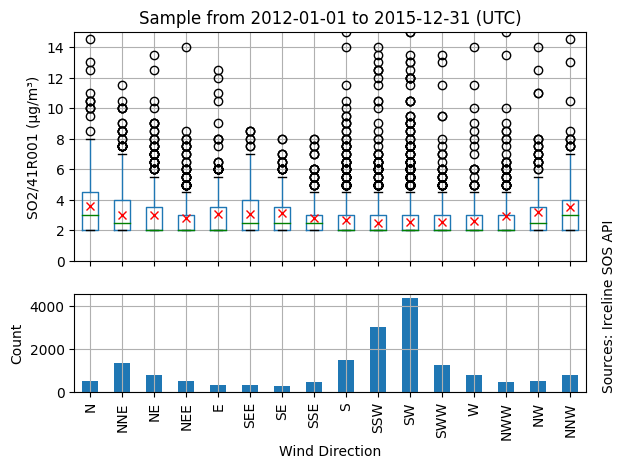

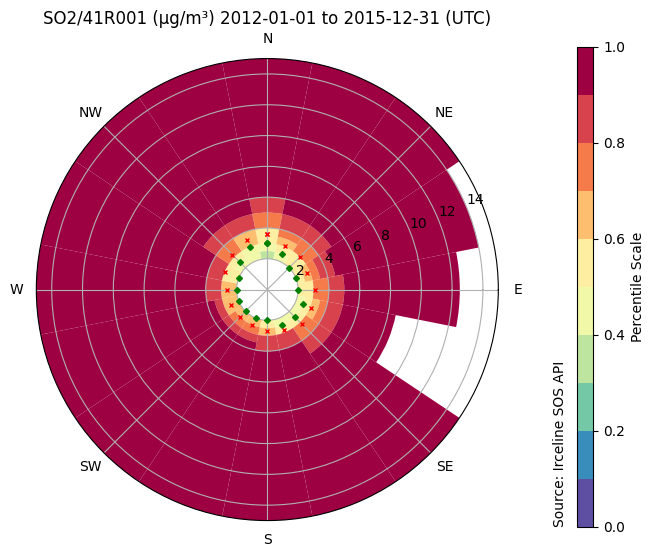

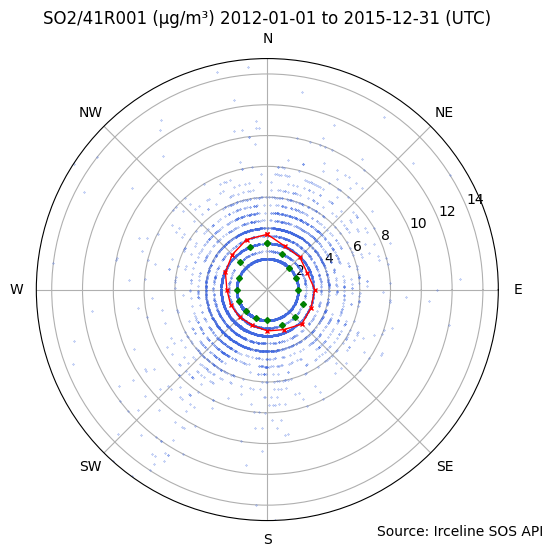

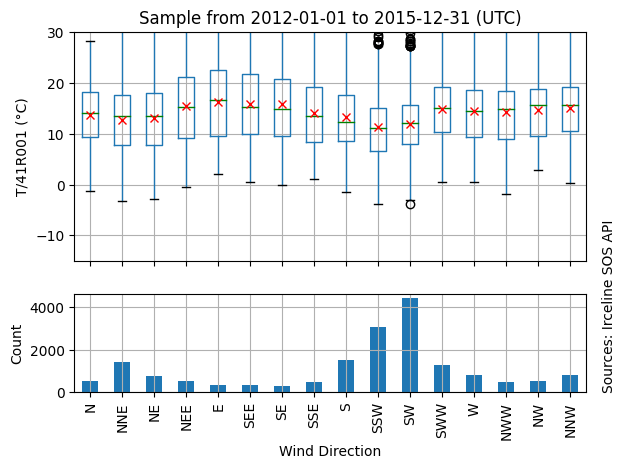

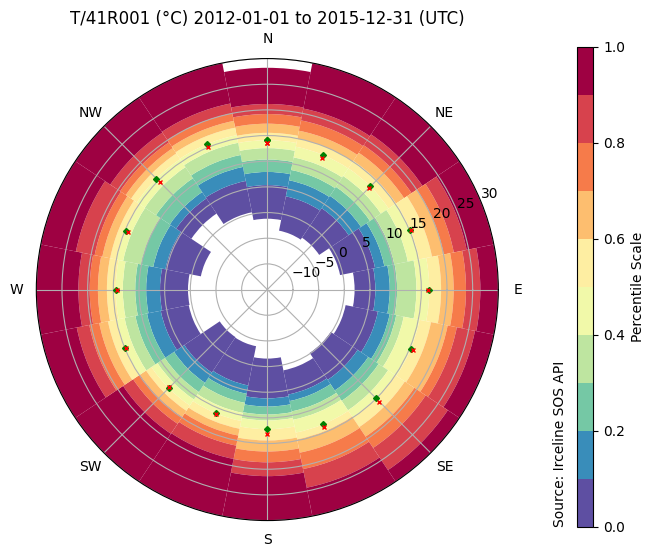

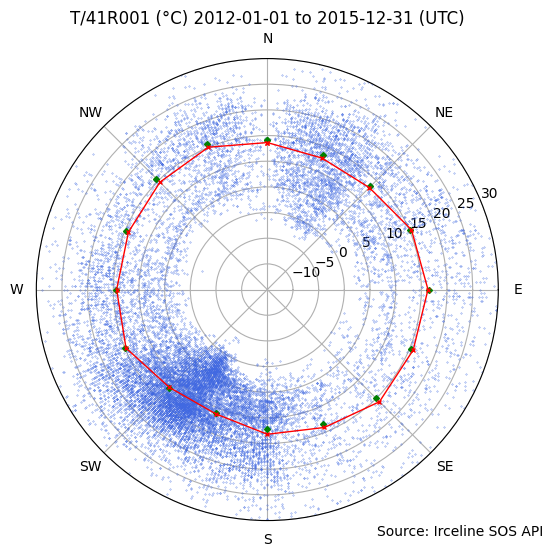

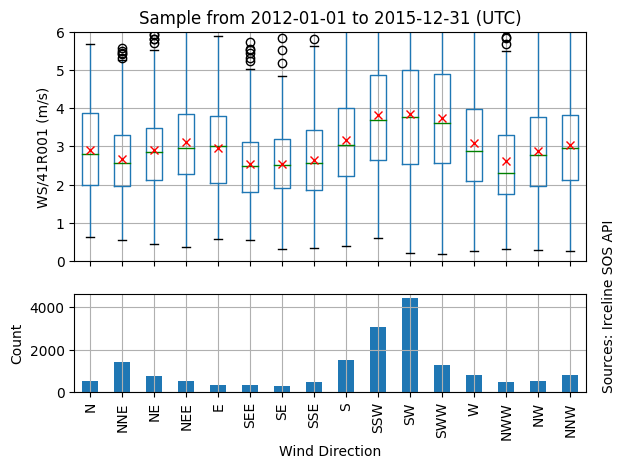

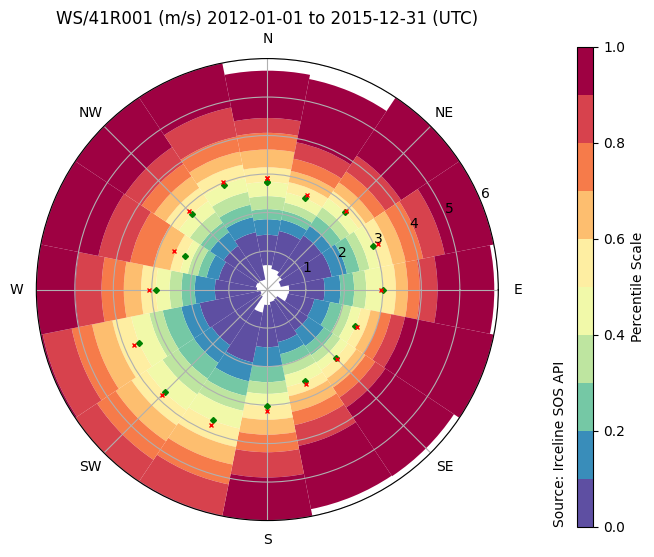

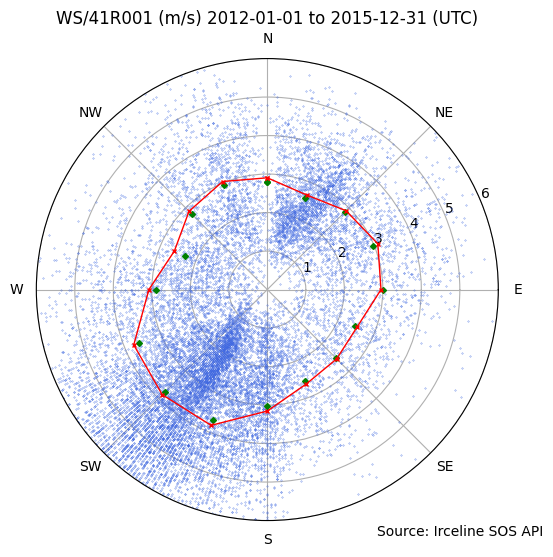

In [10]:
for k in skeys:
    print(k)
    axe1 = Wind.boxplot(data.loc[q], k, theta='WD/41R001 (°G)')
    axe1[0].set_ylim(scales[k.split('/')[0]])
    axe1[0].set_title("Sample from {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe1[0].figure.text(0.925, 0.155, "Sources: Irceline SOS API", rotation=90)
    axe2 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)')
    axe2.set_ylim(scales[k.split('/')[0]])
    axe2.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe2.figure.text(0.87, 0.105, "Source: Irceline SOS API", rotation=90)
    axe3 = Wind.rose(data.loc[q], k, theta='WD/41R001 (°G)', quantiles=False, points=True, mean_linewidth=1.0)
    axe3.set_ylim(scales[k.split('/')[0]])
    axe3.set_title(k + " {:%Y-%m-%d} to {:%Y-%m-%d} (UTC)".format(data.loc[q].index.min(), data.loc[q].index.max()))
    axe3.figure.text(0.65, 0.085, "Source: Irceline SOS API", rotation=0)
    
    #break

In [11]:
from scipy import stats

In [12]:
k = "WS/41R001 (m/s)"

<AxesSubplot:xlabel='start'>

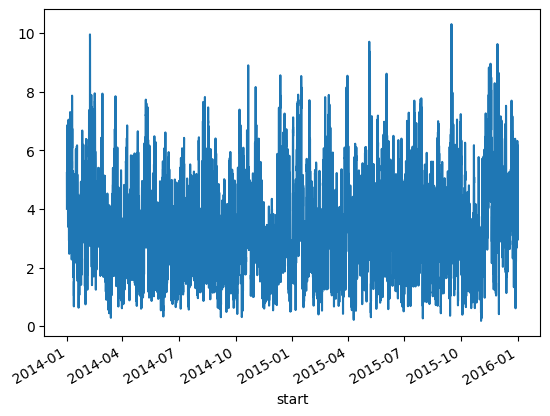

In [35]:
data[k].dropna().plot()

In [13]:
law = stats.exponweib(*stats.exponweib.fit(data[k].dropna()))

In [14]:
v = np.linspace(0, 15, 200)

In [15]:
kde = stats.gaussian_kde(data[k].dropna())

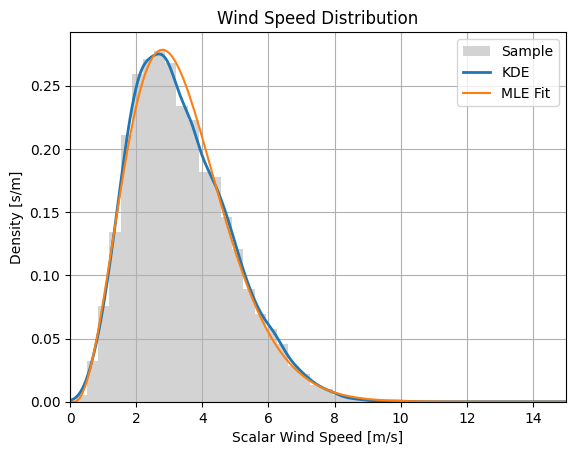

In [16]:
k = "WS/41R001 (m/s)"
axe = data[k].plot(kind="hist", density=1, color="lightgray", bins=30, label="Sample")
data[k].plot(kind="kde", linewidth=2, ax=axe, label="KDE")
axe.plot(v, law.pdf(v), label="MLE Fit")
#axe.plot(v, kde.pdf(v), label="KDE PDF")
axe.set_title("Wind Speed Distribution")
axe.set_xlabel("Scalar Wind Speed [m/s]")
axe.set_ylabel("Density [s/m]")
axe.set_xlim([0, 15])
axe.legend()
axe.grid()

In [17]:
x = data[k].dropna().values

In [18]:
stats.ks_1samp(x, law.cdf)

KstestResult(statistic=0.012184564811712928, pvalue=0.011033112693525023)

In [19]:
stats.ks_2samp(x, kde.pdf(np.linspace(0, 15, 20)))

KstestResult(statistic=0.9997712324849871, pvalue=3.0825993984136966e-73)

In [20]:
stats.ks_2samp(x, x)

KstestResult(statistic=0.0, pvalue=1.0)

In [22]:
site = data.filter(regex="41R001")

In [ ]:
fig, axe = plt.subplots()
axe.plot(site.filter(regex="WS"), site.filter(regex="O3"), '.')

In [ ]:
fig, axe = plt.subplots()
axe.plot(site.filter(regex="NO2"), site.filter(regex="O3"), '.')
axe.grid()
#axe.set_aspect("equal")

In [ ]:
site.columns

In [ ]:
import seaborn as sns
#sns.set_theme(style="ticks")

In [ ]:
def tag(x):
    if (x.month >= 4) & (x.month < 10):
        return "Summer"
    else:
        return "Winter"

In [ ]:
def dow(x):
    if x.dayofweek < 5:
        return "Weekday"
    else:
        return "Weekend"

In [ ]:
def night(x):
    if (x.hour >= 7) & (x.hour < 19):
        return "Day"
    else:
        return "Night"

In [ ]:
site["season"] = site.index.map(tag)
site["dow"] = site.index.map(dow)
site["day"] = site.index.map(night)
site["both"] = site["season"]+"/"+site["dow"]

In [ ]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", #hue="season",
    kind="hex",
)

In [ ]:
g = sns.jointplot(
    data=site,
    x="WS/41R001 (m/s)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

In [23]:
g = sns.jointplot(
    data=site,
    x="WS/41R001 (m/s)", y="NO2/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

NameError: name 'sns' is not defined

In [24]:
g = sns.jointplot(
    data=site,
    x="WD/41R001 (°G)", y="NO2/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

NameError: name 'sns' is not defined

In [25]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

NameError: name 'sns' is not defined

In [26]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="NO2/41R001 (µg/m³)", hue="season",
    kind="kde",
)

NameError: name 'sns' is not defined

In [27]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)", hue="season",
    kind="kde", #xlim=[-5,35], ylim=[0, 100]
)

NameError: name 'sns' is not defined

In [28]:
g = sns.jointplot(
    data=site,
    x="WD/41R001 (°G)", y="O3/41R001 (µg/m³)",# hue="season",
    kind="hex",
)

NameError: name 'sns' is not defined

In [29]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", hue="season",
    kind="kde",
)

NameError: name 'sns' is not defined

In [ ]:
from odapi.toolbox import Sun
sun = Sun()

In [ ]:
site["day"] = site.index.floor('1D')
days = pd.Series(site["day"].unique())
solar = pd.DataFrame(days.apply(sun.solar_day).to_list(), index=days)
solar.sample(5)

In [ ]:
site = site.merge(solar, left_on="day", right_index=True)

In [ ]:
site["start"] = site.index

In [ ]:
site["start"] = site["start"].dt.tz_convert("UTC")

In [ ]:
def night(x):
    if (x["dawn"] <= x["start"]) and (x["start"] < x["dusk"]):
        return "Day"
    else:
        return "Night"

In [ ]:
site["night"] = site.apply(night, axis=1)

In [ ]:
site.groupby(["season", "night"])["day"].count().plot(kind="bar")

In [ ]:
site[["start", "day", "dawn", "dusk", "night"]].sample(20, random_state=1)

In [ ]:
((solar["dusk"] - solar["dawn"]).dt.total_seconds()/3600).plot()

In [ ]:
site["tag"] = site["season"]+"/"+site["night"]

In [ ]:
g = sns.jointplot(
    data=site,
    x="T/41R001 (°C)", y="O3/41R001 (µg/m³)", hue="tag",
    kind="kde",
)

In [ ]:
g = sns.jointplot(
    data=site,
    x="NO2/41R001 (µg/m³)", y="O3/41R001 (µg/m³)", hue="tag",
    kind="kde",
)